Rows removed: 144
Rows remaining: 881


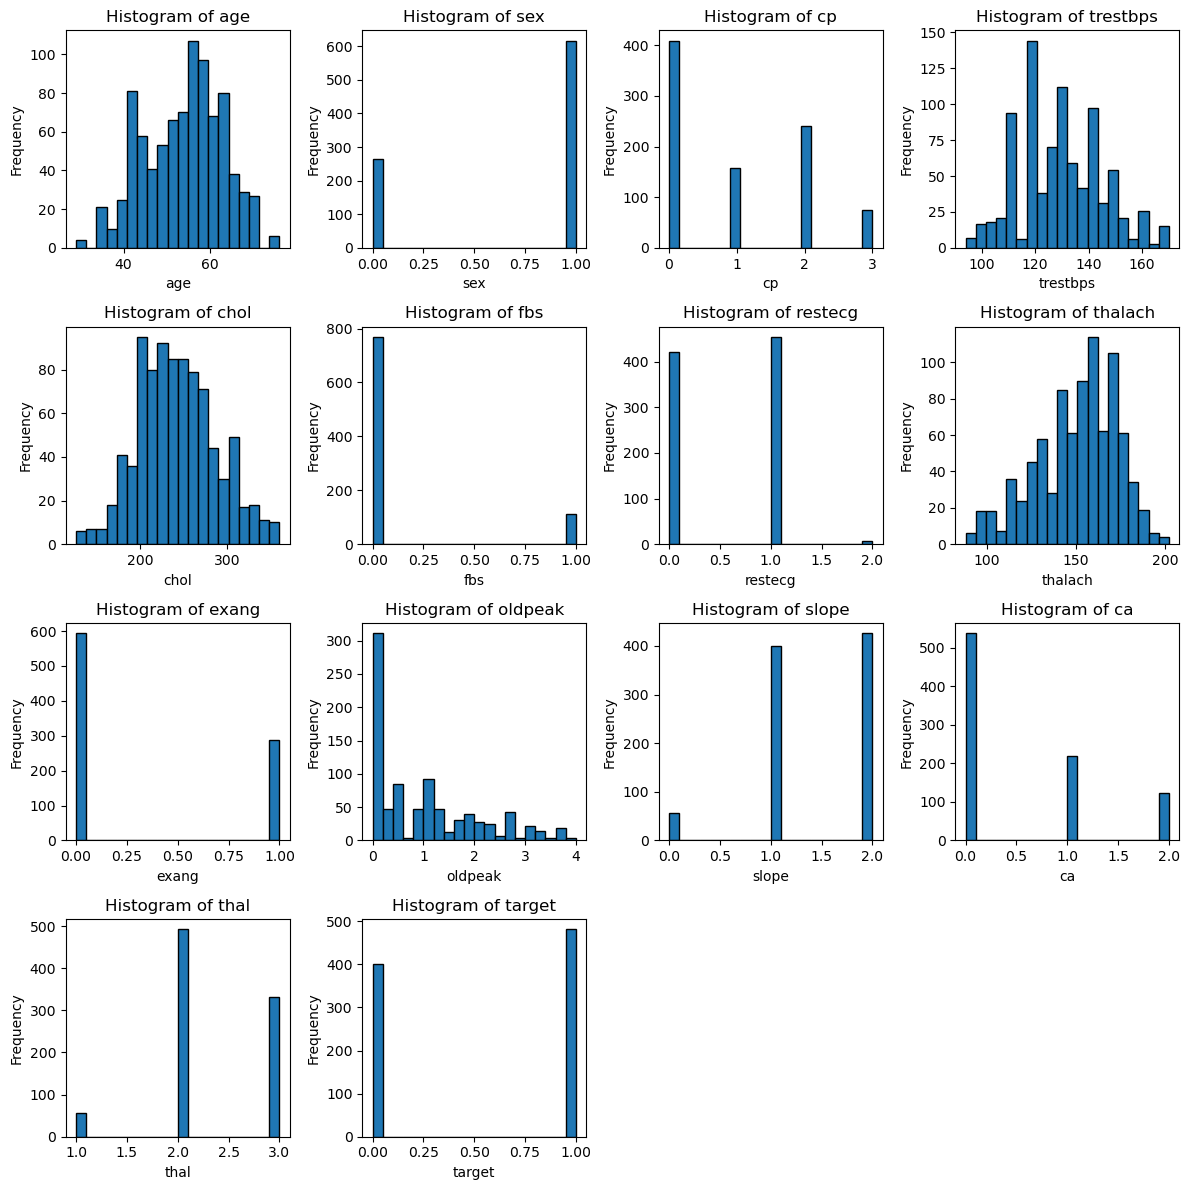

In [17]:
# --- Outlier removal (Fernando K.D.P.S / IT24104089) ---


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

# Function to remove outliers using IQR
def remove_outliers(df):
    original_rows = df.shape[0]  # Store the original number of rows
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for col in numerical_columns:
        # Skip binary columns (those with only 2 unique values)
        if df[col].nunique() == 2:
            continue
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Show the number of rows removed
    removed_rows = original_rows - df.shape[0]
    print(f"Rows removed: {removed_rows}")
    print(f"Rows remaining: {df.shape[0]}")
    
    return df

# Remove outliers
cleaned_data = remove_outliers(df)

# Function to plot histograms for all numerical columns (including binary)
def plot_histograms(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    # Create subplots
    num_columns = len(numerical_columns)
    rows = (num_columns // 4) + (num_columns % 4 > 0)  # Calculate number of rows needed
    plt.figure(figsize=(12, 3 * rows))
    
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(rows, 4, i)  # Adjust the number of rows and columns as needed
        plt.hist(df[col], bins=20, edgecolor='black')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot histograms for the cleaned dataset
plot_histograms(cleaned_data)
